# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
!pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


598

In [3]:
## Create Data Frame to Hold Cities
city_df = pd.DataFrame({'City': cities})

##Create columns in DataFrame to hold Cities Data
city_df['Cloudiness'] = ''
city_df['Country'] = ''
city_df['Date'] =''
city_df['Humidity'] = ''
city_df['Lats'] = ''
city_df['Lngs'] = ''
city_df['Temperature'] = ''
city_df["Wind Speed (mph)"] = ''

##Apply Numeric formating to cells holding numeric values
city_df[["Lats",
         "Lngs",
         "Temperature",
         "Humidity",
         "Cloudiness",
         "Wind Speed (mph)",]] = city_df[["Lats",
                                    "Lngs",
                                    "Temperature",
                                    "Humidity",
                                    "Cloudiness",
                                    "Wind Speed (mph)",]].apply(pd.to_numeric)
city_df.head(7)


,City,Cloudiness,Country,Date,Humidity,Lats,Lngs,Temperature,Wind Speed (mph)
0,vaini,NaN,,,NaN,NaN,NaN,NaN,NaN
1,touros,NaN,,,NaN,NaN,NaN,NaN,NaN
2,rikitea,NaN,,,NaN,NaN,NaN,NaN,NaN
3,taolanaro,NaN,,,NaN,NaN,NaN,NaN,NaN
4,ahipara,NaN,,,NaN,NaN,NaN,NaN,NaN
5,ancud,NaN,,,NaN,NaN,NaN,NaN,NaN
6,sorong,NaN,,,NaN,NaN,NaN,NaN,NaN


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = 'http://api.openweathermap.org/data/2.5/weather?'

for index, row in city_df.iterrows(): 
    #get City Name from df
    cityfound = row['City']
    #assemble url and make API request
    query_url = url + "appid=" + api_key + "&q=" + cityfound + "&units=metric"
    # extract results
    print(f"Processing record {index}: {cityfound}.")
    response = requests.get(query_url).json()
    time.sleep(1)
    try:
        city_df.loc[index,"Temperature"] = response['main']['temp_max']
        city_df.loc[index, "Date"] = int(response['dt'])
        city_df.loc[index,"Country"] = response['sys']['country']
        city_df.loc[index,"Lats"] = response['coord']['lat']
        city_df.loc[index, "Lngs"] = response['coord']['lon']
        city_df.loc[index, "Humidity"] = response['main']['humidity']
        city_df.loc[index, "Cloudiness"] = response['clouds']['all']
        city_df.loc[index, "Wind Speed (mph)"] = response['wind']['speed']
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        city_df.drop(index)
#     print(response.keys())  
#     break

Processing record 0: vaini.
Processing record 1: touros.
Processing record 2: rikitea.
Processing record 3: taolanaro.
City not found. Skipping...
Processing record 4: ahipara.
Processing record 5: ancud.
Processing record 6: sorong.
Processing record 7: deputatskiy.
Processing record 8: pevek.
Processing record 9: howard springs.
Processing record 10: laurel.
Processing record 11: provideniya.
Processing record 12: tongzi.
Processing record 13: vardo.
Processing record 14: brae.
Processing record 15: sao filipe.
Processing record 16: broome.
Processing record 17: san quintin.
Processing record 18: pedernales.
Processing record 19: sioux lookout.
Processing record 20: talnakh.
Processing record 21: mahebourg.
Processing record 22: atuona.
Processing record 23: faanui.
Processing record 24: mataura.
Processing record 25: neyshabur.
Processing record 26: punta arenas.
Processing record 27: banjar.
Processing record 28: sentyabrskiy.
City not found. Skipping...
Processing record 29: sitka

Processing record 229: fare.
Processing record 230: fort nelson.
Processing record 231: nikolskoye.
Processing record 232: katsuura.
Processing record 233: yulara.
Processing record 234: biak.
Processing record 235: san policarpo.
Processing record 236: guadix.
Processing record 237: sangar.
Processing record 238: port lincoln.
Processing record 239: taltal.
Processing record 240: jaicos.
Processing record 241: vidim.
Processing record 242: nokaneng.
Processing record 243: kruisfontein.
Processing record 244: bredasdorp.
Processing record 245: oranjemund.
Processing record 246: markova.
Processing record 247: isabela.
Processing record 248: okhotsk.
Processing record 249: cidreira.
Processing record 250: tall kayf.
Processing record 251: pocatello.
Processing record 252: liniere.
City not found. Skipping...
Processing record 253: ponta do sol.
Processing record 254: outram.
Processing record 255: samarai.
Processing record 256: half moon bay.
Processing record 257: shihezi.
Processing 

Processing record 458: saiha.
Processing record 459: maloy.
Processing record 460: san cristobal.
Processing record 461: khorinsk.
Processing record 462: alta floresta.
Processing record 463: manjacaze.
Processing record 464: rantepao.
Processing record 465: phan thiet.
Processing record 466: hanzhong.
Processing record 467: hobyo.
Processing record 468: japura.
Processing record 469: tarauaca.
Processing record 470: shache.
Processing record 471: kathu.
Processing record 472: kidderminster.
Processing record 473: halifax.
Processing record 474: nouakchott.
Processing record 475: naica.
Processing record 476: hasaki.
Processing record 477: eyl.
Processing record 478: mega.
Processing record 479: monrovia.
Processing record 480: machico.
Processing record 481: souillac.
Processing record 482: black diamond.
Processing record 483: meulaboh.
Processing record 484: bani walid.
Processing record 485: aykhal.
Processing record 486: senanga.
Processing record 487: riviere-au-renard.
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
clean_df = city_df.set_index("City").dropna()
clean_df.head()

,Cloudiness,Country,Date,Humidity,Lats,Lngs,Temperature,Wind Speed (mph)
City,,,,,,,,
vaini,62.0,IN,1558732639,86.0,15.34,74.49,26.85,0.53
touros,20.0,BR,1558732640,78.0,-5.20,-35.46,28.00,4.10
rikitea,98.0,PF,1558732641,74.0,-23.12,-134.97,24.15,4.26
ahipara,38.0,NZ,1558732644,100.0,-35.17,173.16,14.44,3.47
ancud,90.0,CL,1558732645,100.0,-41.87,-73.83,8.00,5.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (C)')

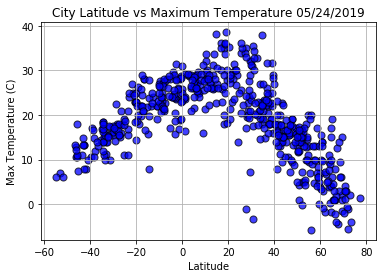

In [19]:
plt.scatter(clean_df['Lats'], clean_df['Temperature'], marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
plt.grid()
plt.title('City Latitude vs Maximum Temperature 05/24/2019')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Max Temperature Observation
As expected, temperatures closer to 0 on the X axis are higher than those closer to the origin than those at the outer extremties. The Latitude of 0 is the equater, which is where most tropical climates are hosted. The Earth's Poles are at the upper and the lower most Latitudes which is reflected nearest the origin and nearest the X axis outer limit.

#### Latitude vs. Humidity Plot

,Cloudiness,Country,Date,Humidity,Lats,Lngs,Temperature,Wind Speed (mph)
City,,,,,,,,
paita,0.0,PE,1558733182,290.0,-5.09,-81.11,17.0,7.7


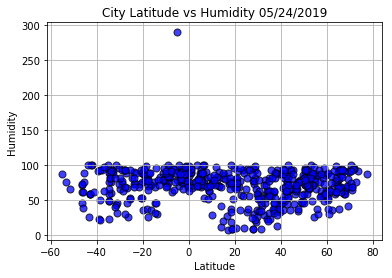

In [20]:
plt.scatter(clean_df['Lats'], clean_df['Humidity'], marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
plt.grid()
plt.title('City Latitude vs Humidity 05/24/2019')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
clean_df.sort_values("Humidity",ascending=False).head(1)

# Humidity Observation with Outlier
Humidity measure the amount of water vapor air. With the exception of one point, the data has a measure of humidity between 110 and 0. The outlier is the city of Paita, a costal city of Peru. For more information about the weather in Paita [click here](https://www.climatestotravel.com/climate/peru#coast).

(0, 110)

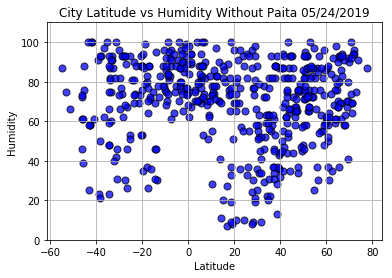

In [21]:
plt.scatter(clean_df['Lats'], clean_df['Humidity'], marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
plt.grid()
plt.title('City Latitude vs Humidity Without Paita 05/24/2019')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.ylim(0,110)

# Humidity Observation without Outlier
Once removing the city of Patia, the data for humidity falls between 110 and 0. The data is not as uniform as that of temperature. Athough we can see that near the orign and the right extremity of the X axis there are cities with lower levels of humidity, while near 0, the equater, there is no data below 60. Looking at the data, there appears to be more factors in determining humidity than just latitude. 


#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

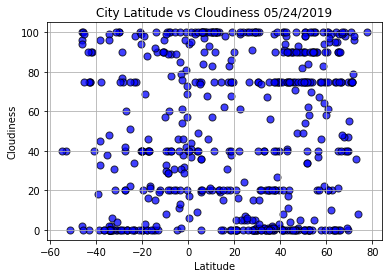

In [22]:
plt.scatter(clean_df['Lats'], clean_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
plt.grid()
plt.title('City Latitude vs Cloudiness 05/24/2019')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


# Cloudiness Observation
The data represented by cloudiness and longitude do not seem to represent a relationship.

#### Latitude vs. Wind Speed Plot

,Cloudiness,Country,Date,Humidity,Lats,Lngs,Temperature,Wind Speed (mph)
City,,,,,,,,
narsaq,97.0,GL,1558733292,30.0,60.91,-46.05,13.00,13.40
nantucket,90.0,US,1558733302,67.0,41.28,-70.10,16.11,12.30
shache,100.0,CN,1558733250,28.0,38.42,77.24,22.75,11.83
celestun,0.0,MX,1558733289,74.0,20.87,-90.40,28.95,11.60
general bravo,0.0,MX,1558733399,37.0,25.79,-99.18,36.05,11.04
comodoro rivadavia,0.0,AR,1558732972,39.0,-45.87,-67.48,18.00,10.80
harlingen,75.0,US,1558732976,55.0,26.19,-97.70,35.00,10.80
karatau,17.0,KZ,1558733027,54.0,43.18,70.46,15.25,10.46
ushuaia,40.0,AR,1558732750,87.0,-54.81,-68.31,6.00,10.30


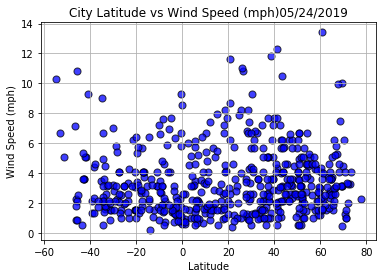

In [25]:
plt.scatter(clean_df['Lats'], clean_df['Wind Speed (mph)'], marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
plt.grid()
plt.title('City Latitude vs Wind Speed (mph)05/24/2019')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
clean_df.sort_values("Wind Speed (mph)",ascending=False).head(10)

# Wind Speed Observation

The data represented by wind speed and longitude do not seem to represent a relationship. When pulling the data for the 10 cities with the highest wind speed there seems to be little similarities in their data for measurements of cloudiness, humidity, or temperature. 